In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import pathlib as pl 
import scipy.stats as ss
from detecta import detect_peaks
import os.path #helps accessing file path 
import glob #library for locating file paths with text searching

##

In [3]:
datapath=pl.Path("data")

In [4]:
print (list(datapath.iterdir()))

[WindowsPath('data/DMSO'), WindowsPath('data/GPR55 Inhibitior'), WindowsPath('data/OCTPEA'), WindowsPath('data/traces_15_131_2_CFP.csv'), WindowsPath('data/traces_15_131_2_YFP.csv')]


In [5]:
CFP_3UV_df= pd.read_csv('data/traces_15_131_2_CFP.csv', header=None, index_col=0) 
YFP_3UV_df=pd.read_csv('data/traces_15_131_2_YFP.csv', header=None, index_col=0)

In [6]:
cfp = CFP_3UV_df.values
yfp = YFP_3UV_df.values

fret=cfp/yfp 
cellmax= fret.max(axis=0)
normfret=fret/cellmax
meannormfret=normfret.mean(axis=1)

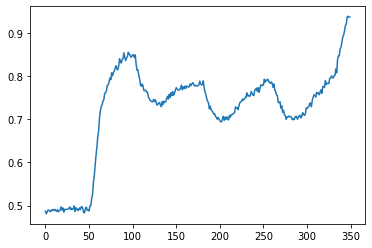

In [78]:
plt.plot(meannormfret.T)

In [79]:
#Organizing all of our repeated data 
Nconditions= 3 #Number of conditions 

#Number of files per condition 
DMSOFileN= 4 # vehicle control repeats in separate files
ProbeFileN= 8 #probe repeats in separate files 
CIDFileN= 4 #probe with gpr55 inhibitor repearts in separate files 

#file name to later save figures 
titlename= 'Probe' 

In [80]:
#Setting experimental parameters to analyze and plot data
UV1f= 150 #frame number where first irradiation occurred
UV2f= 300 #frame number where second irradiation occurred 
UVdur= 15 #number of frames for each irradiation 
posctrlf= 400 #frame number where positive control was added 
frametime= 4 #experiment was conducted by imaging 4 sec per frame 
#convert units from frames to seconds 
UV1= UV1f*frametime-frametime 
UV2= UV2f*frametime-frametime
UVdur= UVdur*frametime
posctrl= posctrlf*frametime-frametime 

In [81]:
#Goal here is to remove the time stamp from files, save time for later and combine multiple trials for each condition into one folder 
#Among each condition, there are different number of repeats so lets combine the number of files per condition into a single array
fileN = [DMSOFileN, ProbeFileN, CIDFileN]
maxfile= np.max(fileN) #becuase each condition has diff number of trials, we want to normalize to max number of trials 
conditionN= np.zeros(3)   
#alldata= np.full([maxfile,3], None)

In [82]:
print (list(datapath.iterdir())) 

[WindowsPath('data/DMSO'), WindowsPath('data/GPR55 Inhibitior'), WindowsPath('data/OCTPEA'), WindowsPath('data/traces_15_131_2_CFP.csv'), WindowsPath('data/traces_15_131_2_YFP.csv')]


In [8]:
DMSOpath = 'data/DMSO/' # use your path
DMSOfiles = glob.glob(DMSOpath + "/*.csv")
OCTPEApath= 'data/OCTPEA' 
OCTfiles= glob. glob(OCTPEApath +"/*.csv") 
Ihibpath= 'data/GPR55 Inhibitior' 
Ihibfiles=glob. glob(Ihibpath +"/*.csv") 
DMSO = []
OCTPEA= []
Ihibpath=[]
consolidated_norm= list()
#alldatas=[]
for filename in DMSOfiles:
    df = pd.read_csv(filename, index_col=0, header=None, delimiter=',')
    baseline = np.mean(df.values[:5,:], axis=0)
    baseline.shape
    n=df.values/baseline 
    consolidated_norm.append(n)
concat_cells=np.concatenate(consolidated_norm, axis=1)
meanovertime=np.mean(concat_cells, axis=1) 
     #alldatas.append(DMSO) 
for filename in OCTfiles: 
    df1 = pd.read_csv(filename, index_col=0, header=None, delimiter=',')
    OCTPEA.append(df1) 
    #alldatas.append(OCTPEA)
for filename in Ihibfiles: 
    df2= pd.read_csv(filename, index_col=0, header=None, delimiter=',')
    Ihibpath.append(df2) 
    #alldatas.append(Ihibpath)
#alldatass = pd.concat(li, axis=0, ignore_index=True)
#alldata= np.array(alldatas, dtype= object)

In [6]:
#want to normalize all of my data within each individual trial within each condition 

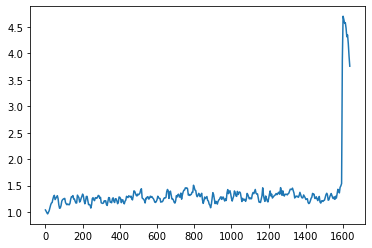

In [7]:
frametime=4 
times= np.arange(meanovertime.shape[0])*frametime
plt.plot(times, meanovertime)

In [86]:
baseline = np.mean(df.values[:5,:], axis=0)
baseline.shape
n=df.values/baseline 


In [87]:
c=np.concatenate(consolidated_norm, axis=1)
c.shape

(410, 247)

In [22]:
def meanofalltrials(filelist):
    consolidated_norm= list()
    for filename in filelist:
        df = pd.read_csv(filename, index_col=0, header=None, delimiter=',')
        baseline = np.mean(df.values[:5,:], axis=0)
        baseline.shape
        n=df.values/baseline 
        consolidated_norm.append(n)
    concat_cells=np.concatenate(consolidated_norm, axis=1)
    meanovertime=np.mean(concat_cells, axis=1) 
    return meanovertime

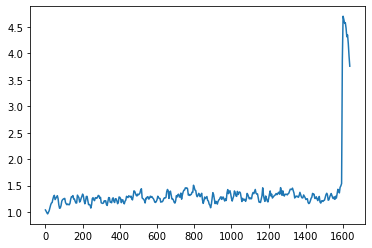

In [24]:
ctrl=meanofalltrials(DMSOfiles) 
frametime=4 
times= np.arange(ctrl.shape[0])*frametime
plt.plot(times, ctrl)

In [90]:
#ctrl 

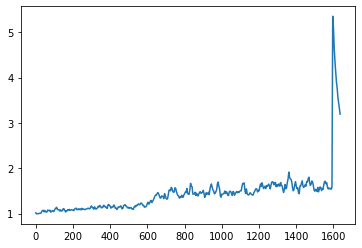

In [91]:
p=meanofalltrials(OCTfiles)  
frametime=4 
times= np.arange(p.shape[0])*frametime
plt.plot(times, p)

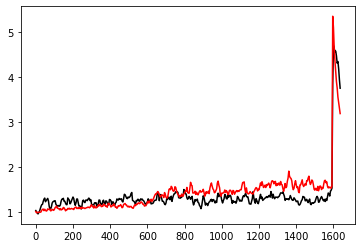

In [92]:
fig, ax = plt.subplots()
ax.plot(times, ctrl, color='black')
ax.plot(times, p, color='red')

In [93]:
#finding peaks before and after UV Stimulation 
#Need to know number of conditions
#array to hold number of cells per trial.. number of cells per trial will be # of items in axis 1 
#array to hold normalized traces per trial 
#we have varying oscillatory ca peaks 
#going to use function detect_peaks similar to matlab find_peaks 
#mph is mean peak height and mpd is mean peak distance 

In [20]:
DMSOfiles = glob.glob(DMSOpath + "/*.csv")


['data/DMSO\\DMSO1.csv',
 'data/DMSO\\DMSO2.csv',
 'data/DMSO\\DMSO3.csv',
 'data/DMSO\\DMSO4.csv']

In [35]:
DMSOfiles = glob.glob(DMSOpath + "/*.csv")
DMSOFileN= 4 
condition = []
for i, DMSOfile filename in enumerate(DMSOfiles):
        df = pd.read_csv(filename, index_col=0, header=None, delimiter=',')
        str(condition)= df
        condition += 1
        print(condition.shape) 
        
 

SyntaxError: cannot assign to operator (Temp/ipykernel_22624/3484746988.py, line 6)

In [54]:
DMSOfiles = glob.glob(DMSOpath + "/*.csv")

DMSOFileN= 4 
data_in = []
condition = []
for filename in DMSOfiles:
        df = pd.read_csv(filename, index_col=0, header=None, delimiter=',')
        d = df.values
        print("d.shape:",d.shape)
        dmean=np.mean(d[:5,:],axis=0,keepdims=True)
        print("dmean shape:", dmean.shape)
        d /= dmean
        data_in.append(d)
        condition.append('DMSO')
#for d in data_in:
#    print(d.shape)
import matplotlib.pyplot as plt
#plt.plot(data_in[1]);


d.shape: (410, 66)
dmean shape: (1, 66)
d.shape: (410, 59)
dmean shape: (1, 59)
d.shape: (410, 50)
dmean shape: (1, 50)
d.shape: (410, 72)
dmean shape: (1, 72)


In [55]:
OCTPEAfiles = glob.glob('data/OCTPEA' + "/*.csv")
for filename in OCTPEAfiles:
        df = pd.read_csv(filename, index_col=0, header=None, delimiter=',')
        d = df.values
        print("d.shape:",d.shape)
        dmean=np.mean(d[:5,:],axis=0,keepdims=True)
        print("dmean shape:", dmean.shape)
        d /= dmean
        data_in.append(d)
        condition.append('OCTPEA')
#for d in data_in:
#    print(d.shape)
import matplotlib.pyplot as plt
#plt.plot(data_in[1]);


d.shape: (410, 70)
dmean shape: (1, 70)
d.shape: (410, 28)
dmean shape: (1, 28)
d.shape: (410, 37)
dmean shape: (1, 37)
d.shape: (410, 64)
dmean shape: (1, 64)
d.shape: (410, 82)
dmean shape: (1, 82)
d.shape: (410, 24)
dmean shape: (1, 24)
d.shape: (410, 47)
dmean shape: (1, 47)
d.shape: (410, 46)
dmean shape: (1, 46)


In [60]:
cellcounts=[d.shape[1] for d in data_in]
print(cellcounts)
print(condition)

[66, 59, 50, 72, 70, 28, 37, 64, 82, 24, 47, 46]
['DMSO', 'DMSO', 'DMSO', 'DMSO', 'OCTPEA', 'OCTPEA', 'OCTPEA', 'OCTPEA', 'OCTPEA', 'OCTPEA', 'OCTPEA', 'OCTPEA']


# section A

## Exercise - do something

enter code to 

### Exercise - do something

<img src="images/photo.jpg">

* item 1
* item 2

make filename "XXX_base.ipynb"  enter code to 

In [ ]:
# Answer
a = 3


In [ ]:
mean_peaks_before =[]
mean_peaks_after []
for d in data_in:
    a=count_peaks_before_flash(d) / number of colimns in d
    b=count_peaks_after(d)/number of columns
    mean_peaks_before.append(a)
    mean_peaks_after.append(b)
    

In [20]:
#want to find peaks before and after UV irradiation 
UV1f= 150 #frame number where first irradiation occurred
UV2f= 300
ypeakthreshold= 1.25 #peak must be at least this value greater in y than signal before / after, mph 
xpeakthreshold= 2 #finds tallest peak and eliminates peak in x direction on either side of peak mpd
for i in np.arange(data_in.shape[1]): # for i in the total number of cells in concatinated normalized controls 
    findprepeak= detect_peaks(ctrl_trials[UV1f-1], mph=ypeakthreshold, mpd=xpeakthreshold) #find peaks withindataset and generate an array
prepeaksnorm=len(findprepeak)/ctrl_trials.shape[1]
    #findpostpeak=len(detect_peaks(ctrl_trials[UV1f:UV2f], mph=ypeakthreshold, mpd=xpeakthreshold)) 
len(findprepeak)

42

In [34]:
condition4

NameError: name 'condition4' is not defined

In [17]:
#need a function to just return thr concatinated cells 
DMSOfiles = glob.glob(DMSOpath + "/*.csv")
DMSOFileN= 4 
def trials(filelist,condition,):
    consolidated_norm= list()
    condition= 
    for i, filename in enumerate(filelist):
        df = pd.read_csv(filename, index_col=0, header=None, delimiter=',')
        condition= df[i]
    return condition
ctrl_trials=trials(DMSOfiles,DMSO) 
ctrl_trials

KeyError: 0

In [11]:
UV1f= 150 #frame number where first irradiation occurred
UV2f= 300
pre_peaks = ctrl_trials[UV1f-1]

In [20]:
#want to find peaks before and after UV irradiation 
UV1f= 150 #frame number where first irradiation occurred
UV2f= 300
ypeakthreshold= 1.25 #peak must be at least this value greater in y than signal before / after, mph 
xpeakthreshold= 2 #finds tallest peak and eliminates peak in x direction on either side of peak mpd
for i in np.arange(ctrl_trials.shape[1]): # for i in the total number of cells in concatinated normalized controls 
    findprepeak= detect_peaks(ctrl_trials[UV1f-1], mph=ypeakthreshold, mpd=xpeakthreshold) #find peaks withindataset and generate an array
prepeaksnorm=len(findprepeak)/ctrl_trials.shape[1]
    #findpostpeak=len(detect_peaks(ctrl_trials[UV1f:UV2f], mph=ypeakthreshold, mpd=xpeakthreshold)) 
len(findprepeak)

42

In [21]:

y =pre_peaks[findprepeak].sum()
len(findprepeak)

42

In [137]:
ctrl_trials.shape[1]

247

In [155]:
ctrl_trials[UV1f:UV2f].shape

(150, 247)

In [154]:
ctrl_trials[:UV1f-1].shape

(149, 247)